<a href="https://colab.research.google.com/github/airul02/Video-Game-Hardware-Sales-Prediction/blob/main/Video_Game_Hardware_Sales_Prediction_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of  Video Game Hardware Sales**

<img  src='https://drive.google.com/uc?id=1jITB8WBfBAP9sh1XjLb4wFvHr8zjnhc5'>

# Introduction

**From the early beginnings of Pac-Man to the latest interactive games, video games have become one of most popular ways to entertain. Choosing the right video game console to match ones gaming needs is essential to getting the full potential out of the player’s gaming experience. Whether a hardcore gamer looking for that competitive edge, or an expressive storyteller wanting to captivate a narrative world, different consoles bring out something different in gamers.**

# What actually video game console?

> **A video game console is an electronic device that outputs a video signal or
image to display a video game that can be played with a game controller. These may be home consoles, which are generally placed in a permanent location connected to a television or other display devices and controlled with a separate game controller, or handheld consoles, which include their own display unit and controller functions built into the unit and which can be played anywhere. Hybrid consoles combine elements of both home and handheld consoles.**













# The purpose of this EDA

**Today, let’s explore how the gaming hardware industry has evolved over the years, and analyse the sales trend over the years.**

# Firstly, import all the libraries and the dataset

To get started, we need to download the relevant dataset. The dataset we will be using comes from Kaggle. This dataset contains a list of hardware video games based on its manufacturer . Each row in the dataset represents a video game hardware and contains the following features:


*   **ConsoleID** : The  acronym of the video game hardware
*   **Console_Name** :  video game hardware's real name
*   **Manufacturer** :  video game hardware's manufacturer
*   **Release_Year** :  release year of the hardware
*   **Sales** : Number of units sold
*   **Type**  : Type of the video game hardware

dataset url : https://www.kaggle.com/datasets/jaimepazlopes/game-console-manufactor-and-sales?datasetId=593905







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns      # used for data visualization and exploratory data analysis.
import matplotlib.pyplot as plt   # functions that make matplotlib work like MATLAB
import itertools   # used to iterate over data structures that can be stepped over using a for-loop
%matplotlib inline
#enable the inline plotting, where the plots/graphs will be displayed # just below the cell where your plotting commands are written


plt.style.use('fivethirtyeight') #replicate the website fivethirtyeight.com

#Data Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup

# Make a request to the website
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table on the page
table = soup.find('table', {'class': 'wikitable'})

# Extract the data from the table
data = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Platform','Type','Company','Release_Year','Sold','Reference'])

# Save the DataFrame to a CSV file
df.to_csv('best_selling_consoles_RAW.csv', index=False)


# Read dataset from scraping

In [ ]:
df=pd.read_csv('/content/best_selling_consoles.csv')
df.head()

,Platform,Type,Company,Release_Year,Sold
0,PlayStation 2,Home,Sony,2000,155.00
1,Nintendo DS,Handheld,Nintendo,2004,154.02
2,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69
3,PlayStation 4,Home,Sony,2013,117.20
4,Nintendo Switch,Hybrid,Nintendo,2017,114.33


In [ ]:
%%HTML
<iframe width="530" height="300" src="https://www.youtube.com/embed/URjJVEeZxxU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
df.info()  #Cheking Data types , missing data etc...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      51 non-null     object 
 1   Type          51 non-null     object 
 2   Company       51 non-null     object 
 3   Release_Year  51 non-null     int64  
 4   Sold          51 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [ ]:
df.head() #Just the first 5 data


,Platform,Type,Company,Release_Year,Sold
0,PlayStation 2,Home,Sony,2000,155.00
1,Nintendo DS,Handheld,Nintendo,2004,154.02
2,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69
3,PlayStation 4,Home,Sony,2013,117.20
4,Nintendo Switch,Hybrid,Nintendo,2017,114.33


In [ ]:
df.tail() # check for the last 5 data

,Platform,Type,Company,Release_Year,Sold
46,Atari 7800,Home,Atari,1986,1.0
47,Atari Lynx,Handheld,Atari,1989,1.0
48,Philips CD-i,Home,Philips,1990,1.0
49,Telstar,Dedicated,Coleco,1976,1.0
50,Atari 5200,Home,Atari,1982,1.0


# We are going to use Klib for data preparation and data cleaning

**klib is a new Python library for importing, cleaning, analyzing and preprocessing data**

We now have the console .csv file in our system. The next step is to read it into a python dataframe for easy manipulation. We will then delve into the data and perform any necessary data cleaning along the way.

# Install the klib

In [ ]:
!pip install klib
#klib is a Python library for importing, cleaning, analyzing and preprocessing data.

# Import the Klib

In [ ]:
import klib

#Check wether it has missing values

In [ ]:
klib.missingval_plot(df)  #check wether it has missing value

No missing values found in the dataset.


# Visualize dataset

GridSpec(6, 3)

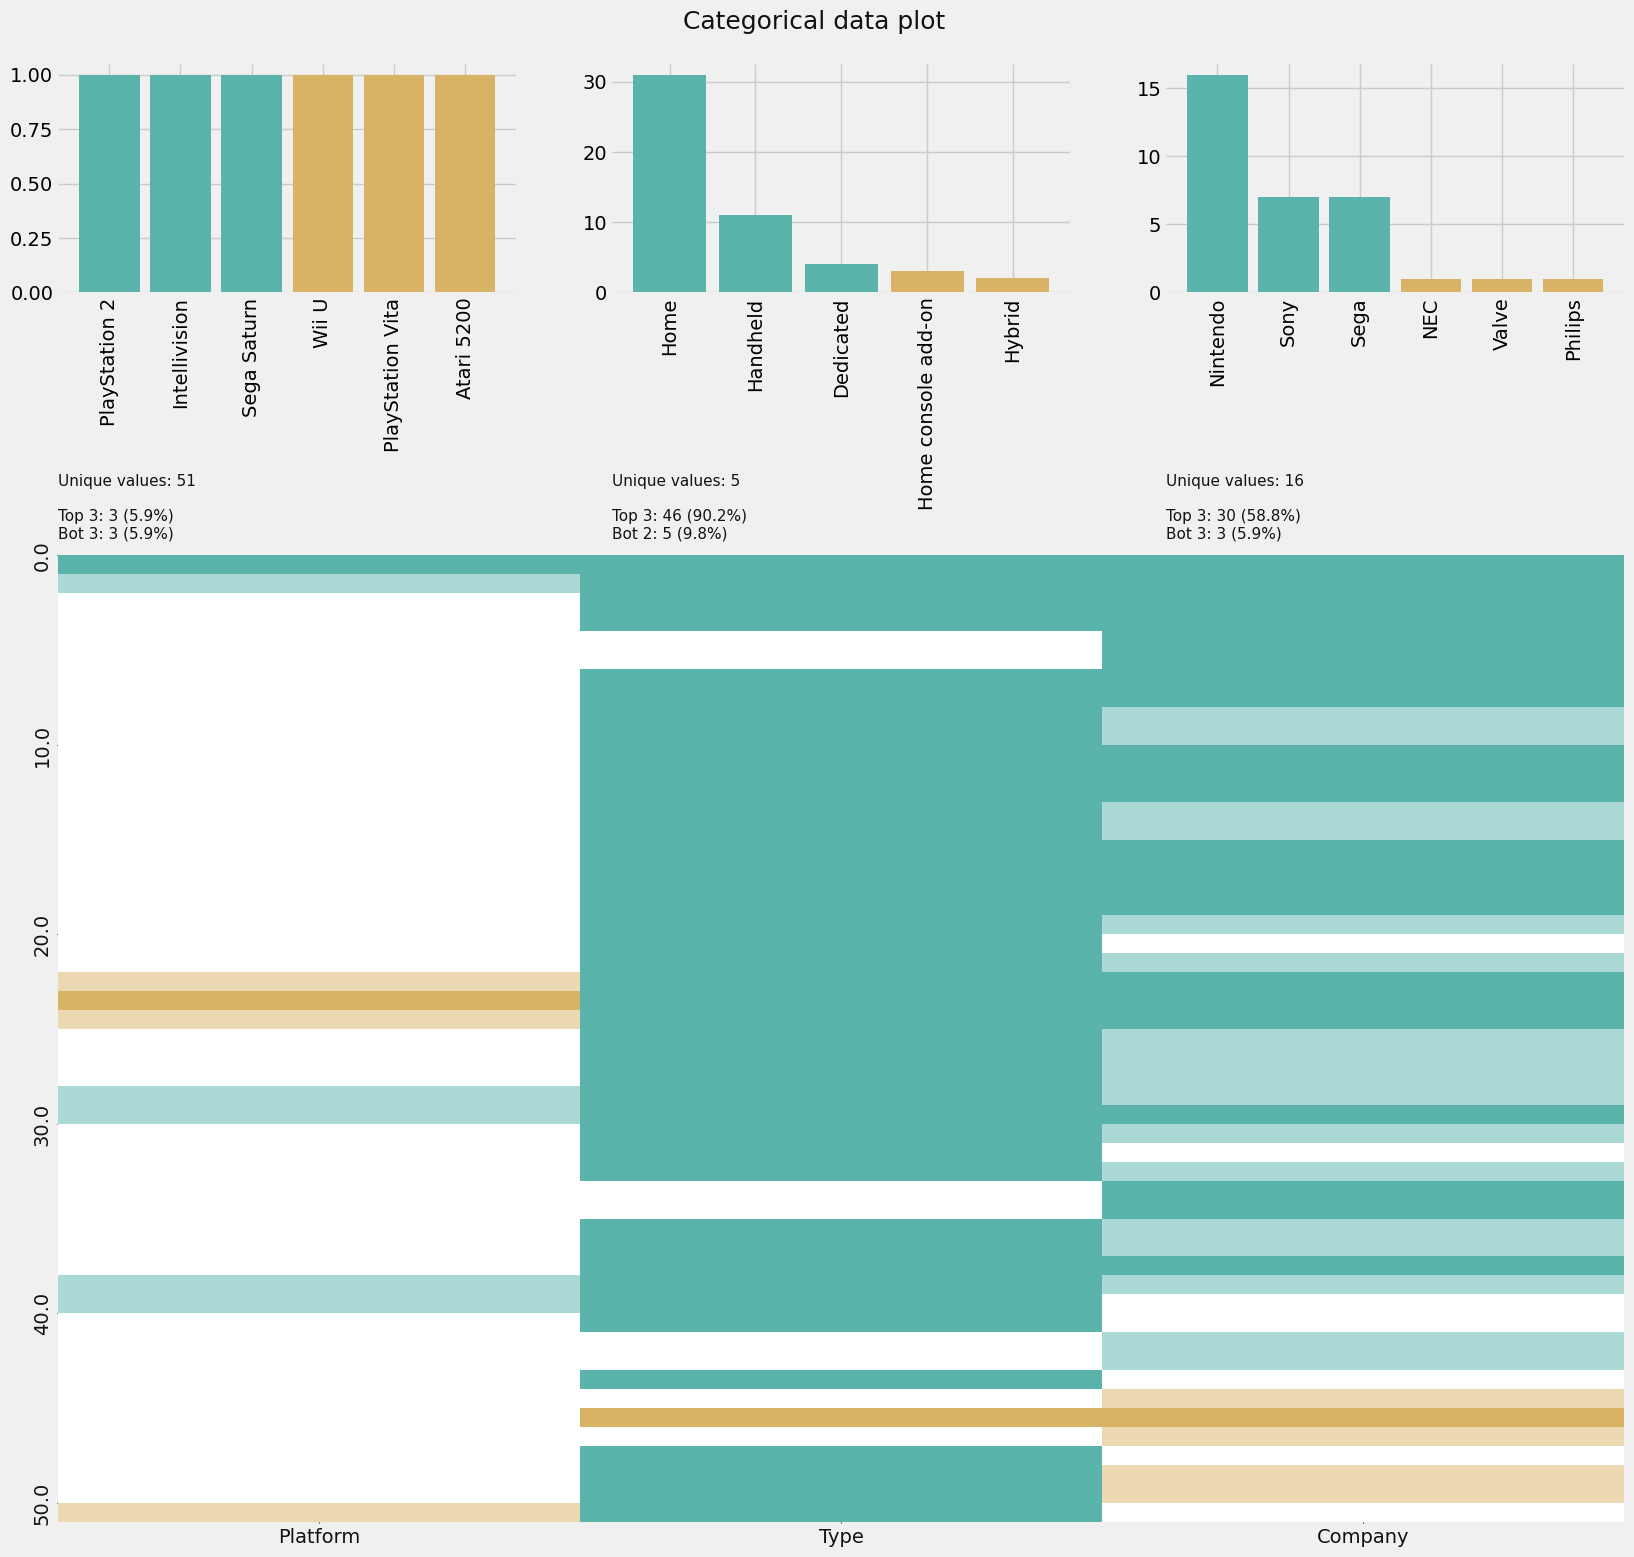

In [ ]:
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

now we can see the trend of this dataset by using klib categorical plot. As we can see it provide the frequency data from 3 highest and 3 lowest.Other than that,we can see manufacturer and type have many colored section on its graph because of the high frequency based on dataset.

# Correlation matrix

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

ValueError: could not convert string to float: 'PlayStation 2'

Through the color-encoded correlation matrix and color-encoded heatmap , we can see it shown a really contrast ratio between Release_Year  and Sold. Now we want to see how the Numerical Data Distribution Plot of this dataset  

<Axes: xlabel='Sold', ylabel='Density'>

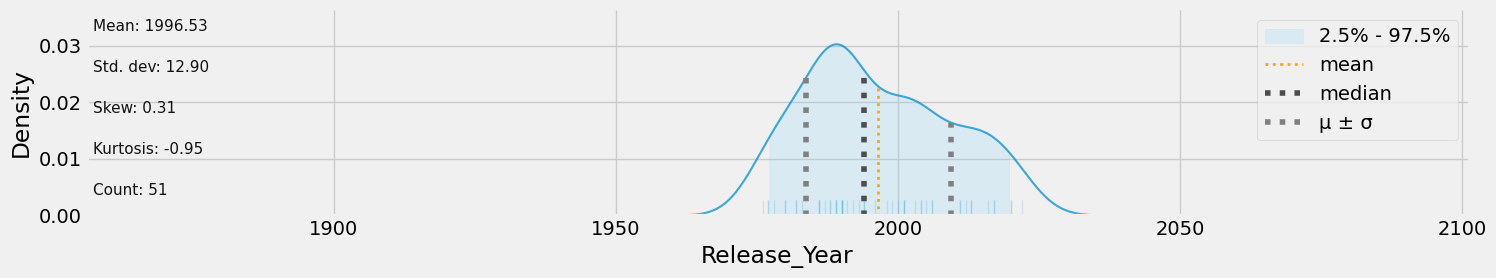

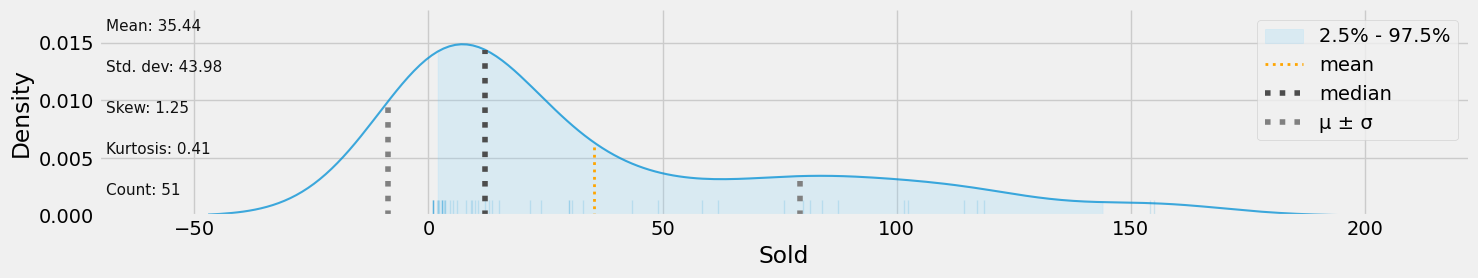

In [ ]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Release_Year,51.0,1996.529412,12.898609,1976.0,1987.5,1994.0,2005.500,2022.0
Sold,51.0,35.441373,43.976024,1.0,3.0,12.0,60.205,155.0


Using python’s `.describe()` method and klib distribution plot  , we can perform statistical analysis on the numerical columns of our data and gather the following facts:


1.   We are working with video game hardware sales  made from 1976 to 2022.
2.   The average Sales of video game hardware is $35.44 million.

3.   Highest sales is  $155 million

4.   Lowest sales is $1 million








#Dashboard

In [ ]:
!pip install pywedge # install pywedge

In [ ]:
import pywedge as pw
mc = pw.Pywedge_Charts(df,c=None,y='Sold')
charts =mc.make_charts()

 **Let's just see Hardware Sales based on  Year production**

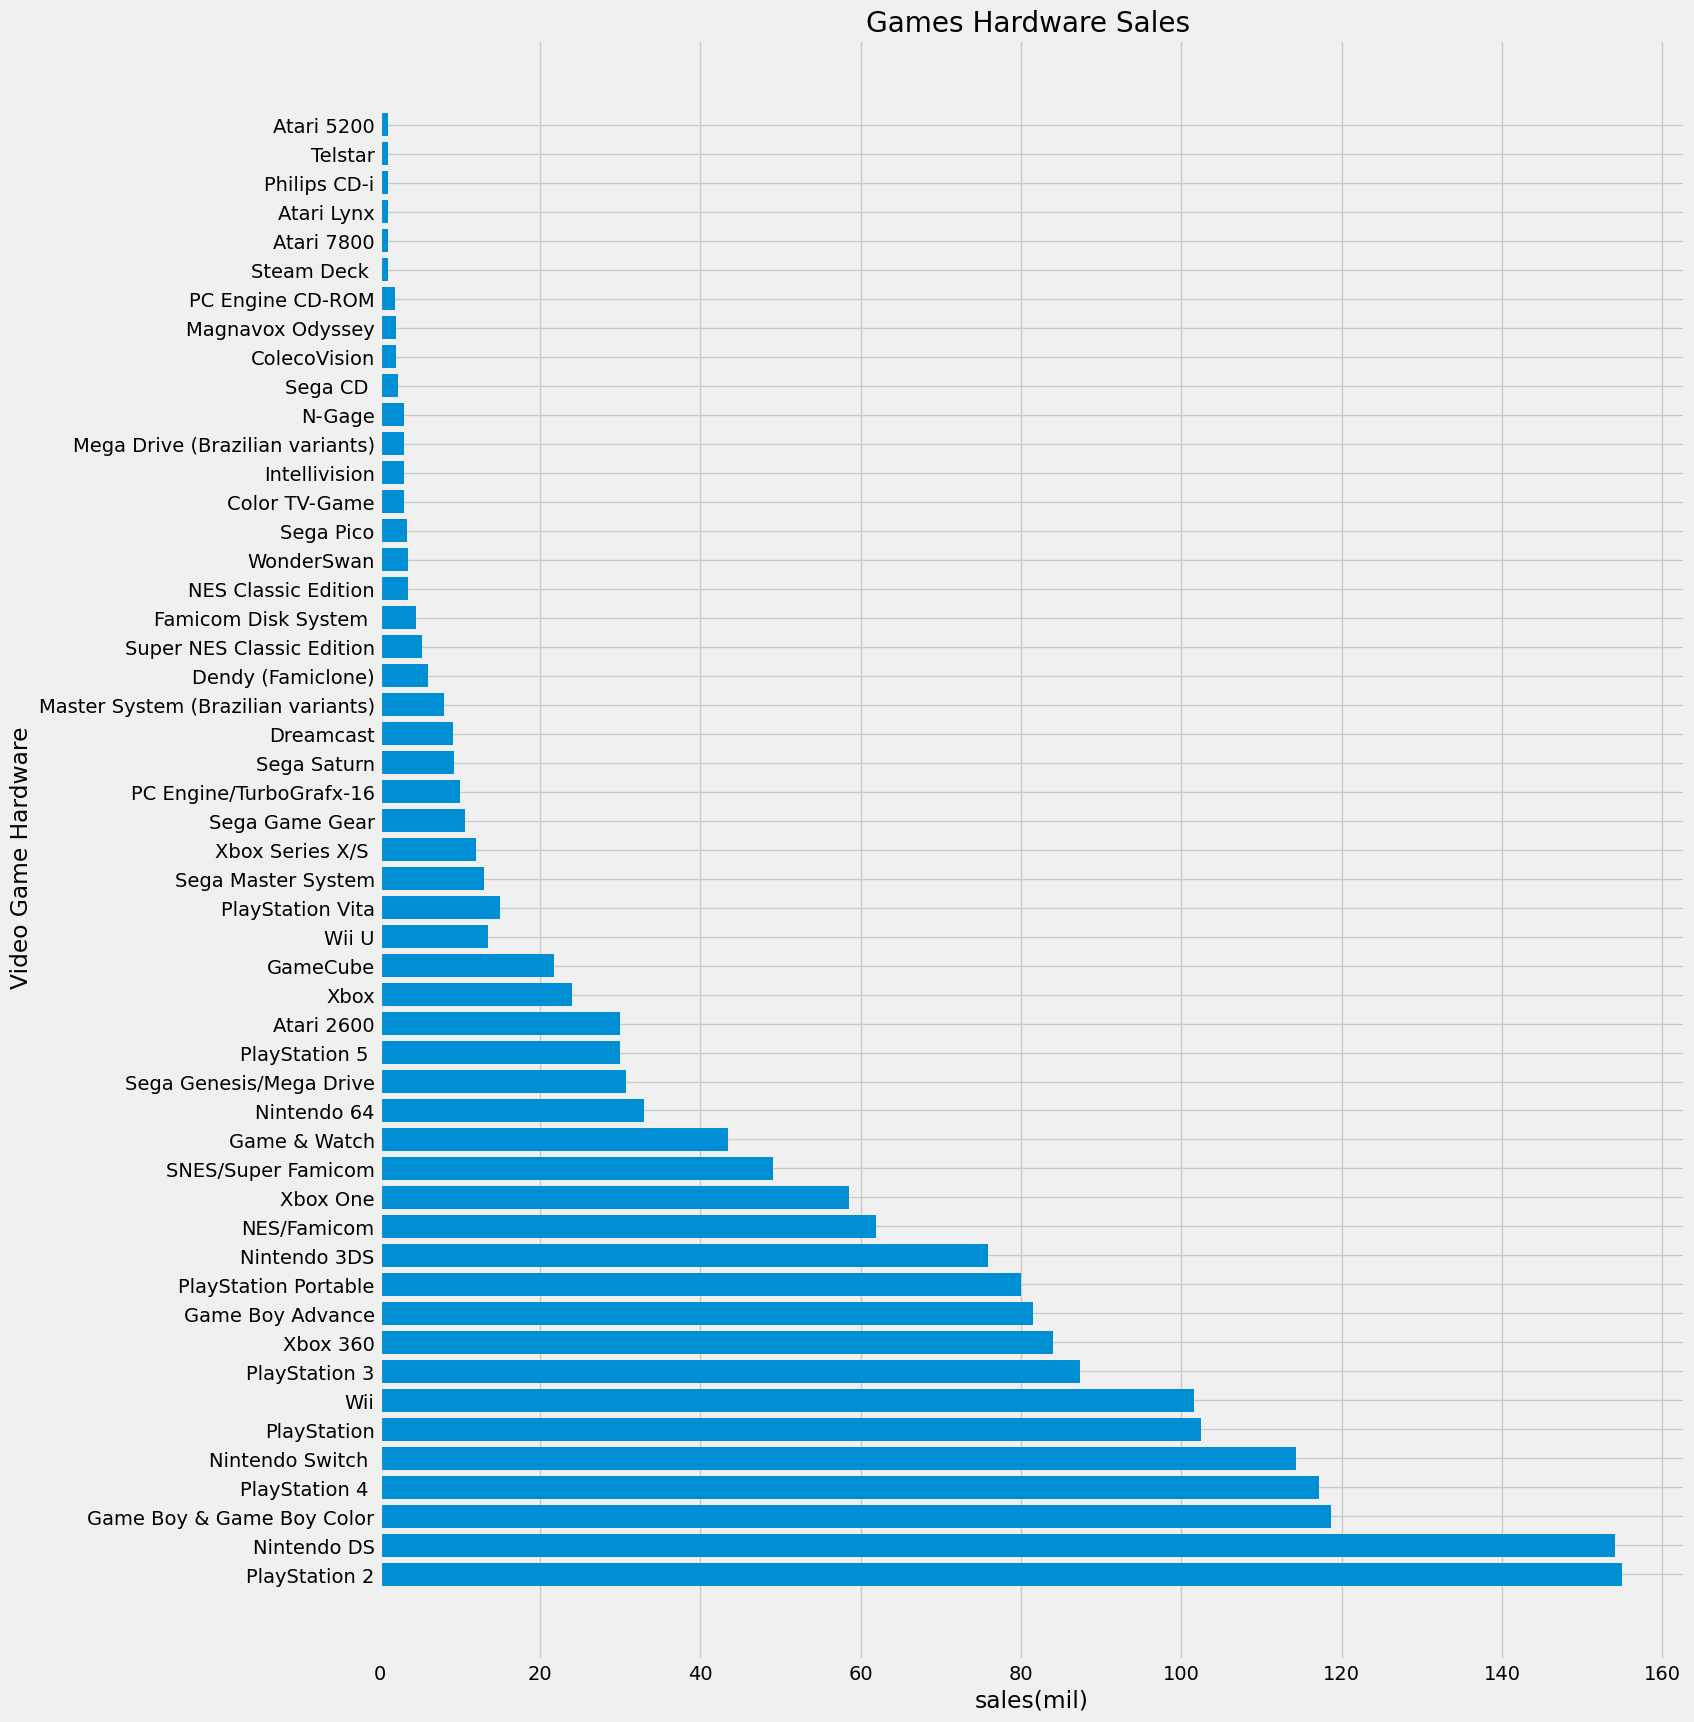

In [ ]:
plt.figure(figsize=(15,20))

sales=df['Sold']
console_name=df['Platform']

plt.barh(console_name,sales)
plt.title('Games Hardware Sales ')
plt.xlabel('sales(mil)')
plt.ylabel('Video Game Hardware  ')
plt.show()

# Exploring the relationship between Release_Year and  Sold

From the following scatterplot, we can see that most game video hardware made global sales of below roughly $50 million mark, with some exceptionally good ones going beyond that.

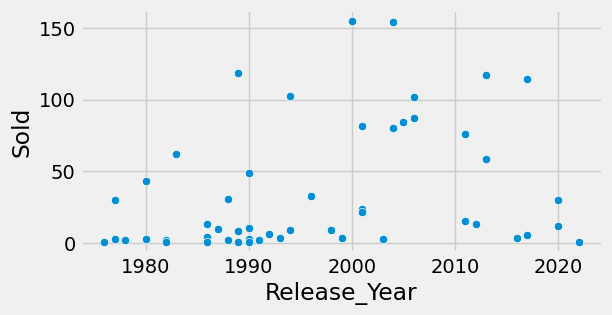

In [ ]:
plt.figure(figsize=(6,3), dpi=100)
sns.scatterplot(data=df,
                x="Release_Year",
                y="Sold")

plt.show()

# Total amount of hardware types in this dataset

From the graph, we can see home console have higher than handheld.Which mean user want home console more than handheld console

Text(0.5, 1.0, 'Hardware Types')

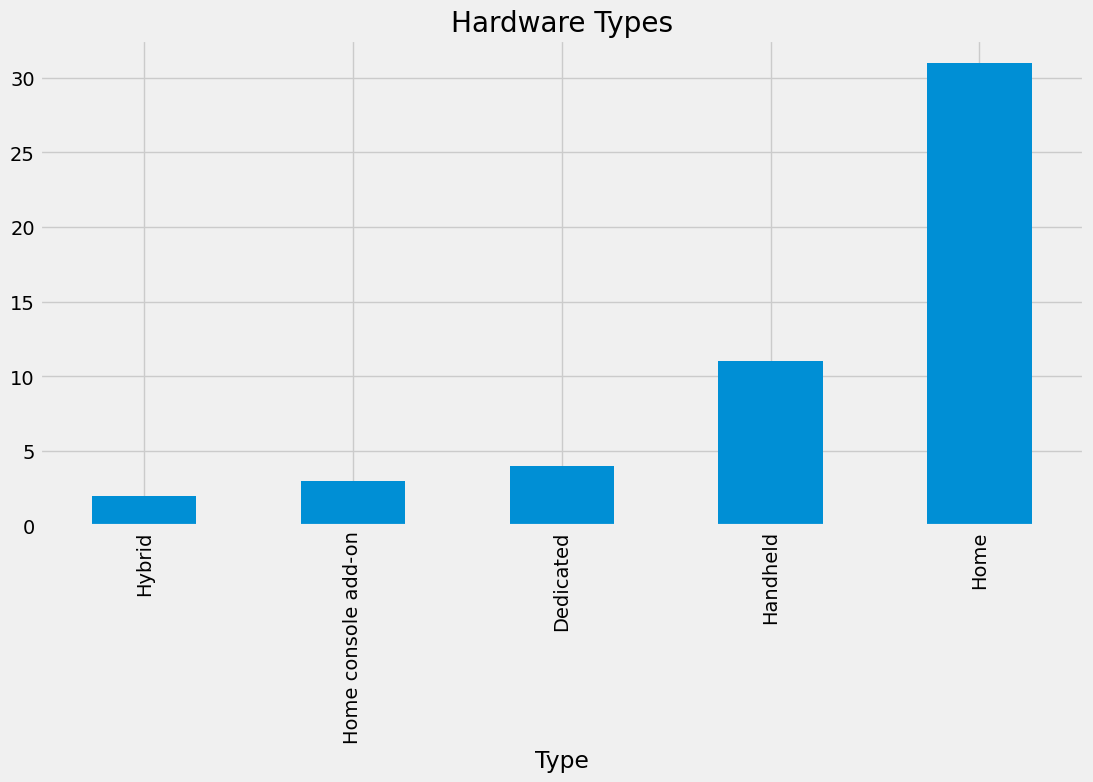

In [ ]:
plt.figure(figsize=(12,6))
plot = df['Type'].value_counts(sort=True,ascending=True).plot.bar()
plt.title('Hardware Types')


# Total amount hardware release based on manufacturer

Nintendo have the most game hardware release throughout the year. In fact, they made a huge gap between others competitors. The dedication of Nintendo Team in making hardware throughout the years possibly make Nintendo a gamers' choice.

Text(0.5, 0, 'Manufacturer')

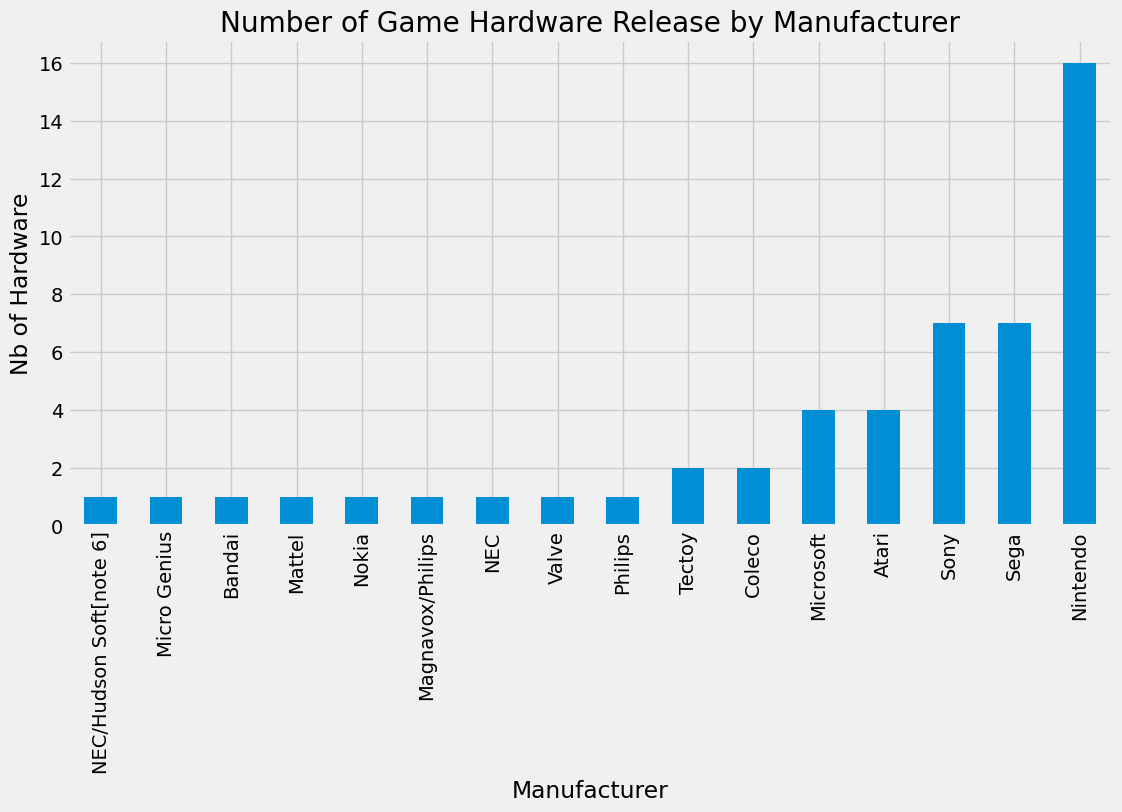

In [ ]:
plt.figure(figsize=(12,6))
plot = df['Company'].value_counts(sort=True,ascending=True).plot.bar()
plt.title('Number of Game Hardware Release by Manufacturer')
plt.ylabel('Nb of Hardware')
plt.xlabel('Manufacturer')

# Now we want arrange based on 10 largest and lowest sales

Top 10 largest hardware sales

In [ ]:
df.nlargest(10, "Sold")

,Platform,Type,Company,Release_Year,Sold
0,PlayStation 2,Home,Sony,2000,155.00
1,Nintendo DS,Handheld,Nintendo,2004,154.02
2,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118.69
3,PlayStation 4,Home,Sony,2013,117.20
4,Nintendo Switch,Hybrid,Nintendo,2017,114.33
5,PlayStation,Home,Sony,1994,102.49
6,Wii,Home,Nintendo,2006,101.63
7,PlayStation 3,Home,Sony,2006,87.40
8,Xbox 360,Home,Microsoft,2005,84.00
9,Game Boy Advance,Handheld,Nintendo,2001,81.51


Top 10 smallest hardware sales

In [ ]:
df.nsmallest(10, "Sold")

,Platform,Type,Company,Release_Year,Sold
45,Steam Deck,Hybrid,Valve,2022,1.00
46,Atari 7800,Home,Atari,1986,1.00
47,Atari Lynx,Handheld,Atari,1989,1.00
48,Philips CD-i,Home,Philips,1990,1.00
49,Telstar,Dedicated,Coleco,1976,1.00
50,Atari 5200,Home,Atari,1982,1.00
44,PC Engine CD-ROM,Home console add-on,NEC,1988,1.92
42,ColecoVision,Home,Coleco,1982,2.00
43,Magnavox Odyssey,Home,Magnavox/Philips,1978,2.00
41,Sega CD,Home console add-on,Sega,1991,2.24


# Save the Figure in pdf

we can simply save all the  figure by using  the plt.savefig() function.

In [ ]:
plot.figure.savefig('hardwareType.pdf')

#Let Change Our Datatype to Numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical column
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df.head()

,Platform,Type,Company,Release_Year,Sold
0,PlayStation 2,2,13,2000,155.00
1,Nintendo DS,1,9,2004,154.02
2,Game Boy & Game Boy Color,1,9,1989,118.69
3,PlayStation 4,2,13,2013,117.20
4,Nintendo Switch,4,9,2017,114.33


#Define The X and y

define the x and y for data splitting into test data and train data

In [ ]:
X = df[['Type','Company']]
y=df[['Sold']]
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


# Data Splitting

We gonna split the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (40, 2)
y_train shape: (40, 1)
X_test shape: (11, 2)
y_test shape: (11, 1)


#Now we want to have preview with the X train data

In [ ]:
X_train.head()

,Type,Company
8,2,6
49,0,2
6,2,9
47,1,0
4,4,9


#Now we want to have preview with the X test data

In [ ]:
X_test.head()

,Type,Company
43,2,3
40,1,10
46,2,0
12,2,9
24,2,12


As you can see , now the both of train and test data have been splitted nicely

#Use Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 #It transforms data by scaling features to a given range.
 #It scales the values to a specific value range without changing the shape of the original distribution
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)


#Now , we want to Choose which of the model suit for forecasting

In [ ]:
X_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 8 to 38
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sold    40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


#Testing model

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the test data
y_predLR = linear_regression.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predLR)
mse = mean_squared_error(y_test, y_predLR)
r2 = r2_score(y_test, y_predLR)

# Print the evaluation metrics
print(f'Linear Regression - MAE: {mae}, MSE: {mse}, R2: {r2}')


Linear Regression - MAE: 31.337335119266562, MSE: 1225.6570252392219, R2: 0.015850624033728278


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_predDTR = dt_regressor.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_predDTR)
mse = mean_squared_error(y_test, y_predDTR)
r2 = r2_score(y_test, y_predDTR)
#print(f'Mean Squared Error: {mse}')
print(f'Linear Regression - MAE: {mae}, MSE: {mse}, R2: {r2}')


Linear Regression - MAE: 18.684621212121215, MSE: 951.4162481641415, R2: 0.23605406110069105


##GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0)

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_predGBR = gbr.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_predGBR)
mse = mean_squared_error(y_test, y_predGBR)
r2 = r2_score(y_test, y_predGBR )
print(f'Linear Regression - MAE: {mae}, MSE: {mse}, R2: {r2}')


Linear Regression - MAE: 21.432009172820496, MSE: 733.011683069627, R2: 0.41142344423134236


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


#Ridge And Lasso


In [ ]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a dictionary of different regression models
models = {'Ridge Regression': Ridge(),
          'Lasso Regression': Lasso()}

# Train and test each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predRL = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_predRL)
    mse = mean_squared_error(y_test, y_predRL)
    r2 = r2_score(y_test,y_predRL)
    print(f'{name} - MAE: {mae}, MSE: {mse},R-squared: {r2}')


Ridge Regression - MAE: 41.5159666493989, MSE: 2535.9692765777804,R-squared: -0.49236297991725797
Lasso Regression - MAE: 40.73211732003027, MSE: 2434.3462042463866,R-squared: -0.43256000341689416


# Use the best model to make final predictions

In [ ]:
new_X =[2,9]
dt_regressor.predict([new_X])

array([1.])